## Captura e Visualização de dados

<b>Professor:</b> Diénert Vieira
<b>Telefone:</b> (83) 9 8182-1479
<b>Email:</b> dienertalencar@gmail.com

### Segunda avaliação de aprendizagem

Depois de extrairmos os dados bancários, passamos para a sua análise. Podemos detectar padrões de comportamentos e gerar visualizações que nos auxiliem na tomada de decisões.

### Tarefa 03
#### Explorar os dados obtidos, gerar visualizações e obter insights

Primeiro importamos a biblioteca de manipulação de dados: Pandas. E usamos um alias (apelido): pd, por brevidade:

In [3]:
import pandas as pd

Depois podemos listar os arquivos do diretório:

In [4]:
import os
os.listdir("../dados/")

['cartao', 'conta', 'tudo.csv', 'tudo.json']

Um dataframe é uma estrutura de dados tabular de duas dimensões (linhas e coluns). Um linha ou coluna consiste em uma série na biblioteca Pandas. A linha a seguir transforma o nosso arquivo gerado no exercício anterior em um dataframe, assim podemos executar operações sobre ele como em um banco de dados.

In [5]:
df = pd.read_json("../dados/tudo.json")

Podemos visualizar o dataframe, apenas exibindo o valor da variável 'df', ou usando os métodos .head(n) para as primeiras 'n' linhas ou .tail(n) para as últimas 'n' linhas. Experimente cada um.

In [6]:
df.head()

,date,descricao,valor,referencia
0,2019-03-11,PGTO DEBITO CONTA 1617 000005071 200211,2078.97,2019-04-10
1,2019-02-26,ADA COMERCIO DE ALIMEN JOAO PESSOA BR,-26.50,2019-04-10
2,2019-02-27,TIO ARMENIO JOAO PESSOA BR,-44.82,2019-04-10
3,2019-03-24,PAG*PinkElephantJoaoP JOAO PESSOA BR,-33.00,2019-04-10
4,2019-03-24,PAG*PinkElephantJoaoP JOAO PESSOA BR,-33.00,2019-04-10


Para tratarmos as datas de forma apropriada, convertemos as strings para o formato apropriado. Acessamos uma coluna ou série, do dataframe usando .nome_da_coluna ou [nome_da_coluna]. Com isso podemos ver o tipo de cada coluna. Vemos que date já está no formato de data, mas a data de referência está como O de Object, ou seja, string.

In [7]:
df.date.dtype

dtype('<M8[ns]')

In [8]:
df.referencia.dtype

dtype('O')

Convertemos para data da seguinte forma:

In [9]:
dateformat = '%Y/%m/%d'

df['date'] = pd.to_datetime(df['date'], format=dateformat)
df['referencia'] = pd.to_datetime(df['referencia'], format=dateformat)

Conferindo a conversão:

In [10]:
df.referencia.dtype

dtype('<M8[ns]')

Com isso, podemos por exemplo, ordenar todo o dataframe pela data.

Saber a data mínima:

In [11]:
df.date.min()

Timestamp('2015-01-02 00:00:00')

Saber a data máxima:

In [12]:
df.date.max()

Timestamp('2020-01-07 00:00:00')

Colocar a data no índice para transformar o dataframe em séries temporais

In [13]:
df.index = df.date

In [14]:
df = df.drop(columns='date')

In [ ]:
df

Ordenando o daframe pelo índice (o padrão é na ordem crescente)

In [ ]:
df = df.sort_index()
df

Salvando o arquivo para CSV para visualizar todos os dados no Libre Office

In [15]:
df.to_csv('../dados/tudo.csv')

Podemos também usar a função 'filtra_e_soma' para encontrar algo específico contido na descrição, sem necessariamente informar toda a descrição

In [17]:
def filtra_e_soma(df, descricao):
    filtrado = df[df.descricao.str.lower().str.count(descricao) > 0]
    print('Soma: ', filtrado.valor.sum())
    return filtrado.copy()

In [18]:
spotify = filtra_e_soma(df, 'ebanx')

Soma:  -245.9


In [19]:
spotify

,descricao,valor,referencia
date,,,
2018-12-23,EBANX SPOTIFY Curitiba BR,-16.9,2019-01-10
2019-02-23,EBANX SPOTIFY Curitiba BR,-16.9,2019-03-10
2019-03-23,EBANX-PNP0A0F7A7D8 CURITIBA BR,-16.9,2019-04-10
2019-04-23,EBANX SPOTIFY Curitiba BR,-16.9,2019-05-10
2019-06-13,EBANX SPOTIFY Curitiba BR,-26.9,2019-07-10
2019-07-13,EBANX SPOTIFY Curitiba BR,-26.9,2019-08-10
2019-08-13,EBANX *PNP0C4218C77 CURITIBA BR,-26.9,2019-09-10
2019-09-13,EBANX SPOTIFY Curitiba BR,-26.9,2019-10-10
2019-10-13,EBANX SPOTIFY Curitiba BR,-26.9,2019-11-10


Podemos gerar um histograma para visualizar a distribuição dos valores

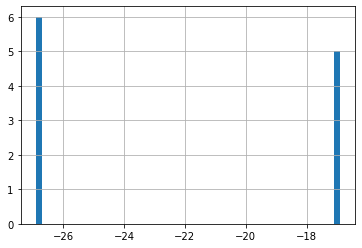

In [21]:
spotify.valor.hist(bins=50)

In [22]:
uber = filtra_e_soma(df, 'uber')

Soma:  -1808.42


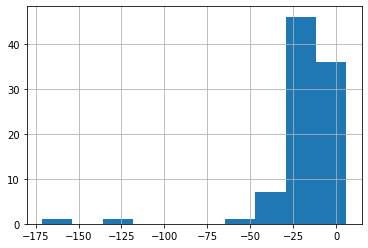

In [23]:
uber.valor.hist()

Podemos gerar o boxplot, para vermos a mediana e os outlies

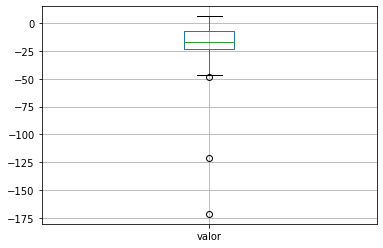

In [24]:
uber.boxplot()

In [25]:
uber

,descricao,valor,referencia
date,,,
2018-12-08,Uber do Brasil TecnologSAO PAULO BR,-21.20,2019-01-10
2018-12-08,Uber do Brasil TecnologSAO PAULO BR,-35.08,2019-01-10
2018-12-08,Uber do Brasil TecnologSAO PAULO BR,-25.94,2019-01-10
2018-12-15,Uber do Brasil TecnologSAO PAULO BR,-19.68,2019-01-10
2018-12-15,Uber do Brasil TecnologSAO PAULO BR,-6.75,2019-01-10
...,...,...,...
2019-12-05,Uber Do Brasil TecnologSAO PAULO BR,-30.41,2020-01-10
2019-12-05,Uber Do Brasil TecnologSAO PAULO BR,-6.00,2020-01-10
2019-12-09,Uber Do Brasil Tecnologia - SAO PAULOBR,6.00,2020-01-10


Vamos usar a primeira biblioteca de visualziação, além do pandas, o Matplotlib

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [55]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [38]:
def plota_linha1(x, y, titulo, inverte=True):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    ax = plt.axes()
    x = x
    y = y * (-1 if inverte else 1)
    ax.set(title = titulo, 
           xlabel='Tempo',
           ylabel='Gasto R$')
    ax.plot(x, y);

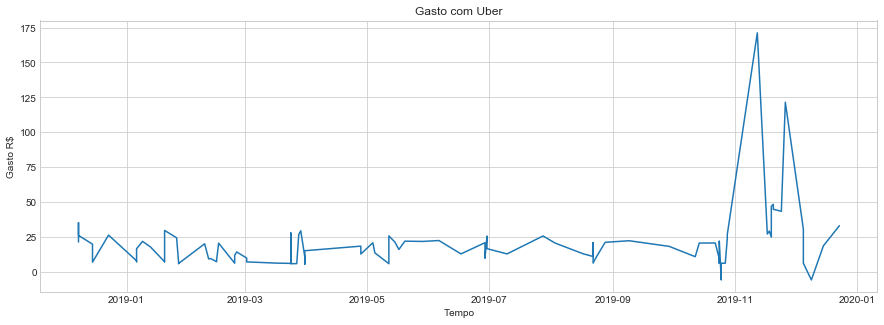

In [39]:
plota_linha1(uber.index, uber.valor, 'Gasto com Uber')

Agora vamos usar uma biblioteca mais rebuscada, a Plotly

In [46]:
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def plota_linha(x, y, titulo, inverte=True):
    plotly.offline.init_notebook_mode(connected=True)

    data = [go.Scatter(x=x, y=y * (-1 if inverte else 1), mode='lines+markers')]

    layout = dict(
        title=titulo,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all',
                         label='Tudo',)
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date',

        ),
        #barmode='stack'
    )

    fig = dict(data=data, layout=layout)

    plotly.offline.iplot(fig)

In [48]:
def filtra_soma_plota(df, palavra, titulo, inverte=True):
    filtro = filtra_e_soma(df, palavra)
    plota_linha(filtro.index, filtro.valor, titulo)
    return filtro

In [50]:
filtra_soma_plota(df, '^posto ', 'Gasto com abastecimentos')

Soma:  -2122.75


,descricao,valor,referencia
date,,,
2018-12-01,POSTO TANQUE CHEIO JOAO PESSOA BR,-13.90,2019-01-10
2018-12-02,POSTO OPCAO JOAO PESSOA BR,-173.54,2019-01-10
2018-12-15,POSTO OPCAO JOAO PESSOA BR,-166.89,2019-01-10
2018-12-21,POSTO TANQUE CHEIO JOAO PESSOA BR,-42.45,2019-01-10
2018-12-27,POSTO CRISTO DE COMBUS JOAO PESSOA BR,-175.40,2019-02-10
2019-01-02,POSTO SAO LUIS VIII JOAO PESSOA BR,-12.00,2019-02-10
2019-01-02,POSTO SAO LUIS VIII JOAO PESSOA BR,-89.80,2019-02-10
2019-01-11,POSTO TANQUE CHEIO JOAO PESSOA BR,-71.94,2019-02-10
2019-01-17,POSTO OPCAO JOAO PESSOA BR,-165.01,2019-02-10


In [51]:
filtra_soma_plota(df, 'uber', 'Gasto com abastecimentos')

Soma:  -1808.42


,descricao,valor,referencia
date,,,
2018-12-08,Uber do Brasil TecnologSAO PAULO BR,-21.20,2019-01-10
2018-12-08,Uber do Brasil TecnologSAO PAULO BR,-35.08,2019-01-10
2018-12-08,Uber do Brasil TecnologSAO PAULO BR,-25.94,2019-01-10
2018-12-15,Uber do Brasil TecnologSAO PAULO BR,-19.68,2019-01-10
2018-12-15,Uber do Brasil TecnologSAO PAULO BR,-6.75,2019-01-10
...,...,...,...
2019-12-05,Uber Do Brasil TecnologSAO PAULO BR,-30.41,2020-01-10
2019-12-05,Uber Do Brasil TecnologSAO PAULO BR,-6.00,2020-01-10
2019-12-09,Uber Do Brasil Tecnologia - SAO PAULOBR,6.00,2020-01-10


In [53]:
filtra_soma_plota(df, 'iof', 'IOF')

Soma:  -262.64


,descricao,valor,referencia
date,,,
2019-02-21,IOF - COMPRA NO EXTERIOR,-5.94,2019-03-10
2019-05-02,IOF - COMPRA NO EXTERIOR,-1.31,2019-06-10
2019-08-08,IOF - COMPRA NO EXTERIOR,-13.53,2019-09-10
2019-08-16,IOF - COMPRA NO EXTERIOR,-14.31,2019-09-10
2019-09-09,IOF - COMPRA NO EXTERIOR,-13.62,2019-10-10
2019-09-20,IOF - COMPRA NO EXTERIOR,-3.09,2019-10-10
2019-09-20,IOF - COMPRA NO EXTERIOR,-10.57,2019-10-10
2019-10-16,IOF - COMPRA NO EXTERIOR,-18.09,2019-11-10
2019-11-04,IOF - COMPRA NO EXTERIOR,-13.41,2019-12-10


In [ ]:
faturas = filtra_soma_plota(df, 'pgto', 'Faturas do Cartão de Crédito', inverte=False)

In [ ]:
faturas = df[df.descricao.str.lower().str.count('pgto') == 0].groupby('referencia')['valor'].sum()
faturas

In [ ]:
plota_linha(faturas.index, faturas.values*-1, 'Gastos Totais')

## Tarefa 03 Concluída